In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Seaborn setup
sns.set(style="white", context="notebook", palette="deep")
COLOR_COLUMNS = ["#66C2FF", "#5CD6D6", "#00CC99", "#85E085", "#FFD966", "#FFB366", "#FFB3B3", "#DAB3FF", "#C2C2D6"]
sns.set_palette(palette=COLOR_COLUMNS, n_colors=4)

In [6]:
filepath = "datasets/app_store.csv"

In [7]:
df = pd.read_csv(filepath, index_col=0)

In [23]:
# We can also describe elements besides ints and floats
df.describe(include="O")

,track_name,currency,ver,cont_rating,prime_genre
count,7197,7197,7197,7197,7197
unique,7195,1,1590,4,23
top,Mannequin Challenge,USD,1.0,4+,Games
freq,2,7197,317,4433,3862


In [24]:
df = df.drop("currency", axis='columns')

In [26]:
df[:2]

,id,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
1,281656475,PAC-MAN Premium,100788224,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
2,281796108,Evernote - stay organized,158578688,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1


In [27]:
def _bytes_resizer(data):
    return np.around(data/1000000, decimals=2)

In [30]:
df['size_mb'] = df['size_bytes'].apply(_bytes_resizer)
df.drop('size_bytes', axis="columns", inplace=True)

In [32]:
df[:2]

,id,track_name,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,size_mb
1,281656475,PAC-MAN Premium,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,100.79
2,281796108,Evernote - stay organized,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,158.58


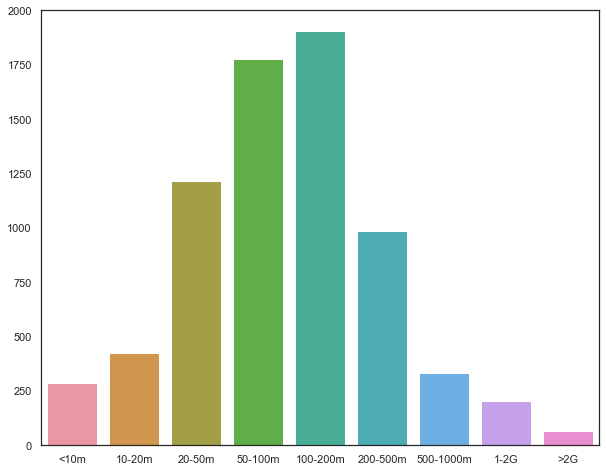

In [36]:
plt.subplots(figsize=(10, 8))

BINS = [0.00, 10.00, 20.00, 50.00, 100.00, 200.00, 500.00, 1000.00, 2000.00, np.inf]
LABELS = ["<10m", "10-20m", "20-50m", "50-100m", "100-200m", "200-500m", "500-1000m", "1-2G", ">2G"]

freqs = pd.cut(df["size_mb"], BINS, include_lowest=True, labels=LABELS)
sns.barplot(y=freqs.value_counts().values, x=freqs.value_counts().index)

In [38]:
BINS = [-np.inf, 0.00, np.inf]
LABELS = ["FREE", "PAID"]
colors = ['lightcoral', 'yellowgreen']

In [39]:
df['price_categories'] = pd.cut(df['price'], BINS, include_lowest=True, labels=LABELS)

In [41]:
df[:2]

,id,track_name,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,size_mb,price_categories
1,281656475,PAC-MAN Premium,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,100.79,PAID
2,281796108,Evernote - stay organized,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,158.58,FREE


(-1.1057396083108322,
 1.1002733599434824,
 -1.1276675874208923,
 1.1112839653444184)

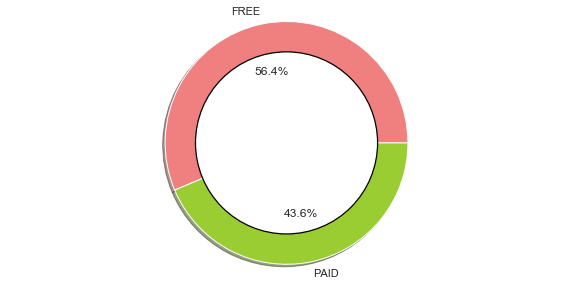

In [44]:
fig, axs = plt.subplots(figsize=(10, 5))
price_df = df["price_categories"].value_counts()

plt.pie(price_df.values, labels=LABELS, colors=colors, autopct='%1.1f%%', shadow=True)
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)

fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')

In [47]:
free_apps = df.loc[df['price_categories'] == "FREE"]
paid_apps = df.loc[df['price_categories'] == "PAID"]

In [48]:
free_apps_rated = free_apps.sort_values(by=["rating_count_tot"], ascending=False)
paid_apps_rated = paid_apps.sort_values(by=["rating_count_tot"], ascending=False)

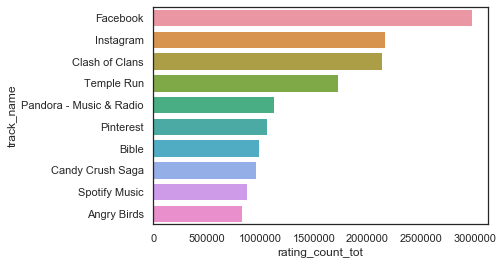

In [50]:
sns.barplot(x=free_apps_rated['rating_count_tot'][:10], y=free_apps_rated['track_name'][:10])

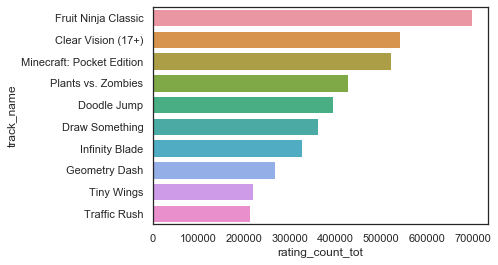

In [58]:
sns.barplot(x=paid_apps_rated['rating_count_tot'][:10], y=paid_apps_rated['track_name'][:10])

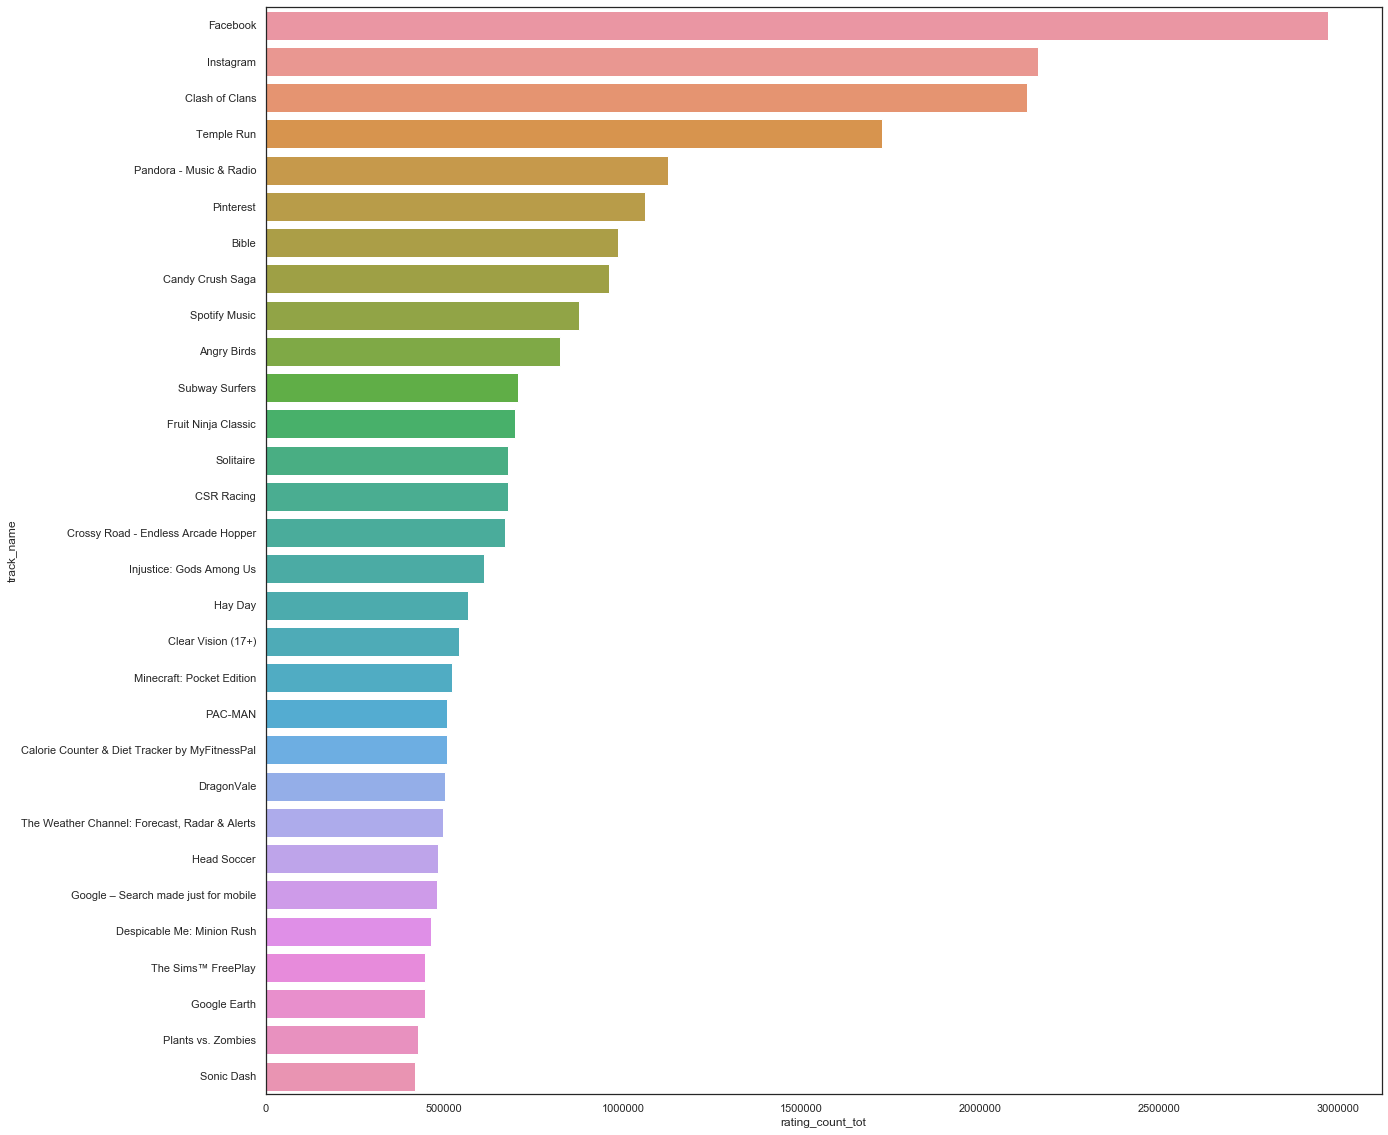

In [59]:
plt.subplots(figsize=(20, 20))
ratings = df.sort_values(by=["rating_count_tot"], ascending=False)
sns.barplot(x=ratings['rating_count_tot'][:30], y=ratings['track_name'][:30])

In [60]:
genres = df['prime_genre'].value_counts()

In [62]:
genres.sort_values(ascending=False, inplace=True)

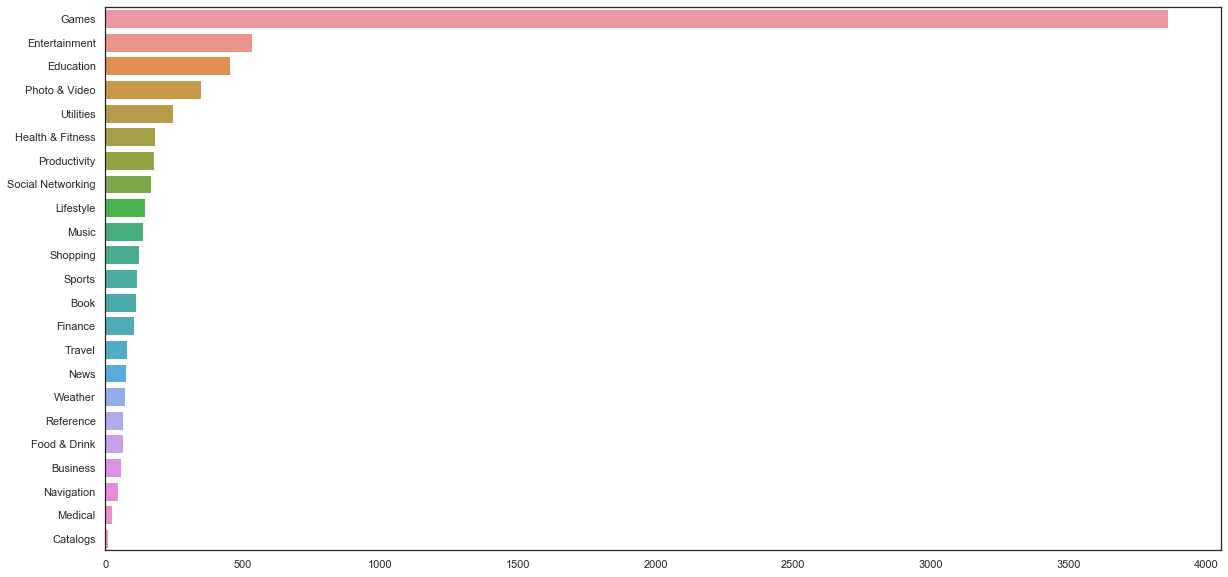

In [64]:
plt.subplots(figsize=(20, 10))
sns.barplot(x=genres.values, y=genres.index, order=genres.index, orient="h")

In [65]:
games = df.loc[df['prime_genre'] == 'Games']

In [67]:
games['price'].shape

(3862,)

In [68]:
prices = (games['price'].value_counts()) / (games['price'].shape[0]) * 100

In [70]:
prices.sort_values(ascending=False, inplace=True)

In [73]:
prices

0.00     58.441222
0.99     11.263594
2.99      8.208182
1.99      7.094770
4.99      5.851890
6.99      3.495598
3.99      3.107198
9.99      0.880373
5.99      0.466080
7.99      0.362506
14.99     0.336613
8.99      0.077680
11.99     0.051787
12.99     0.051787
19.99     0.051787
17.99     0.051787
15.99     0.051787
13.99     0.051787
20.99     0.025893
24.99     0.025893
29.99     0.025893
16.99     0.025893
Name: price, dtype: float64

[Text(0, 0.5, 'percent (%)'), Text(0.5, 0, 'USD')]

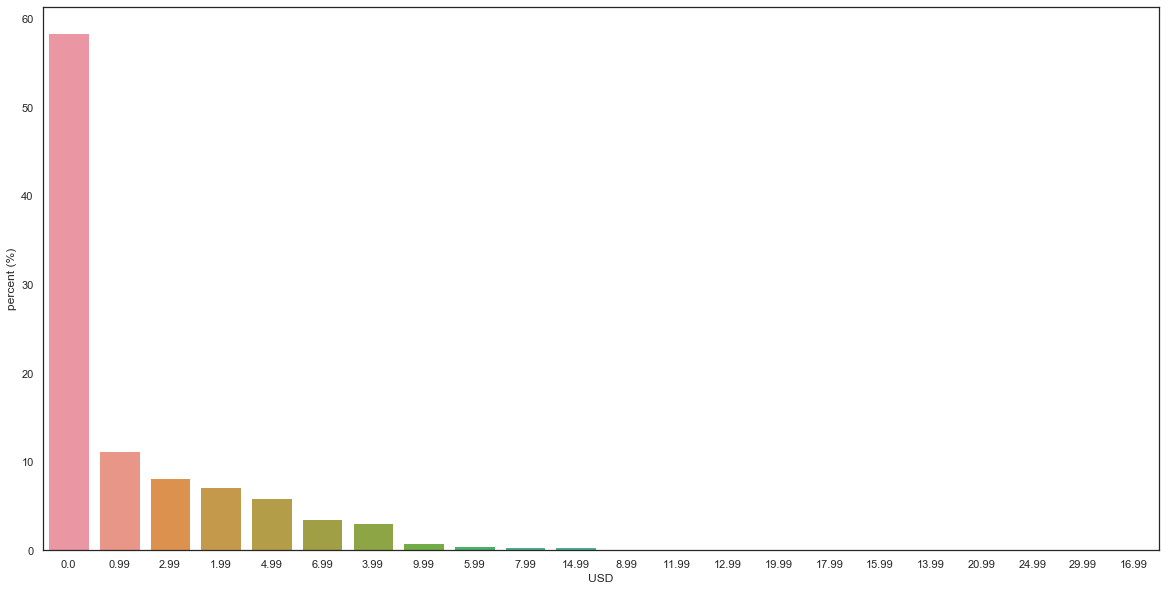

In [72]:
plt.subplots(figsize=(20, 10))
ax = sns.barplot(x=prices.index, y=prices.values, order=prices.index)
ax.set(xLabel="USD", yLabel="percent (%)")

In [74]:
free_games = games.loc[games['price_categories'] == 'FREE']
paid_games = games.loc[games['price_categories'] == 'PAID']

In [76]:
free_games_rated = free_games.sort_values(by=['rating_count_tot'], ascending=False)
paid_games_rated = paid_games.sort_values(by=['rating_count_tot'], ascending=False)

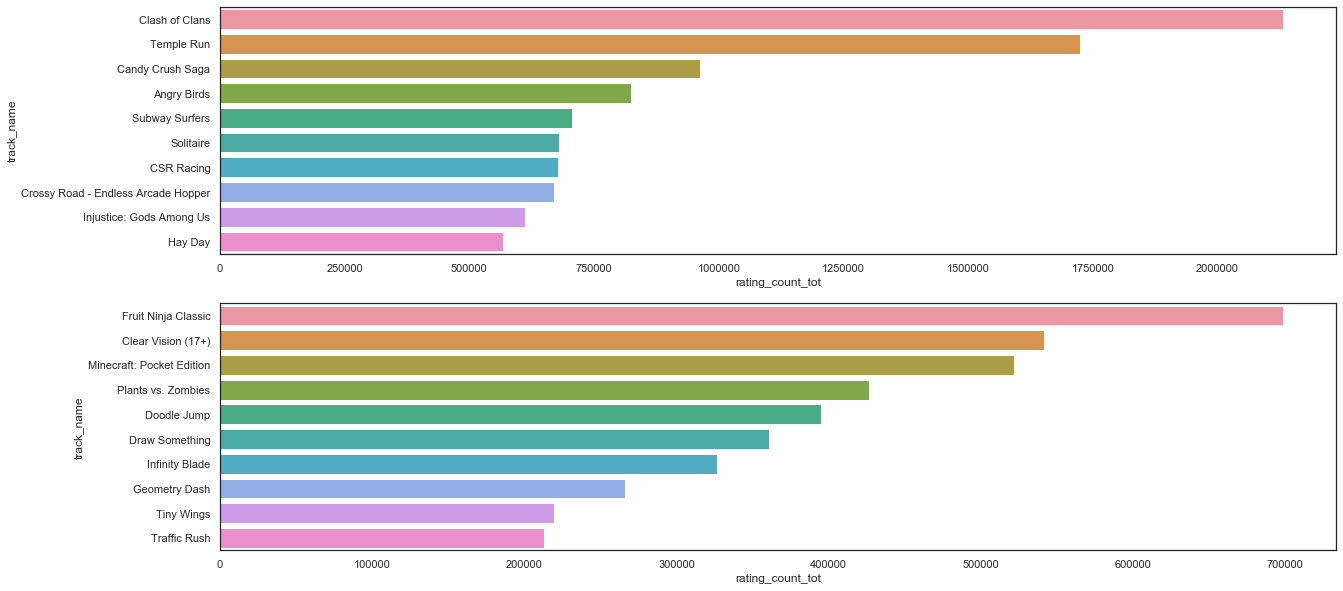

In [79]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

sns.barplot(x=free_games_rated['rating_count_tot'][:10], y=free_games_rated['track_name'][:10], ax=ax1)
sns.barplot(x=paid_games_rated['rating_count_tot'][:10], y=paid_games_rated['track_name'][:10], ax=ax2)

In [80]:
free_games_curr_rt = free_games.sort_values(by=['rating_count_ver'][:10], ascending=False)
paid_games_curr_rt = paid_games.sort_values(by=['rating_count_ver'][:10], ascending=False)

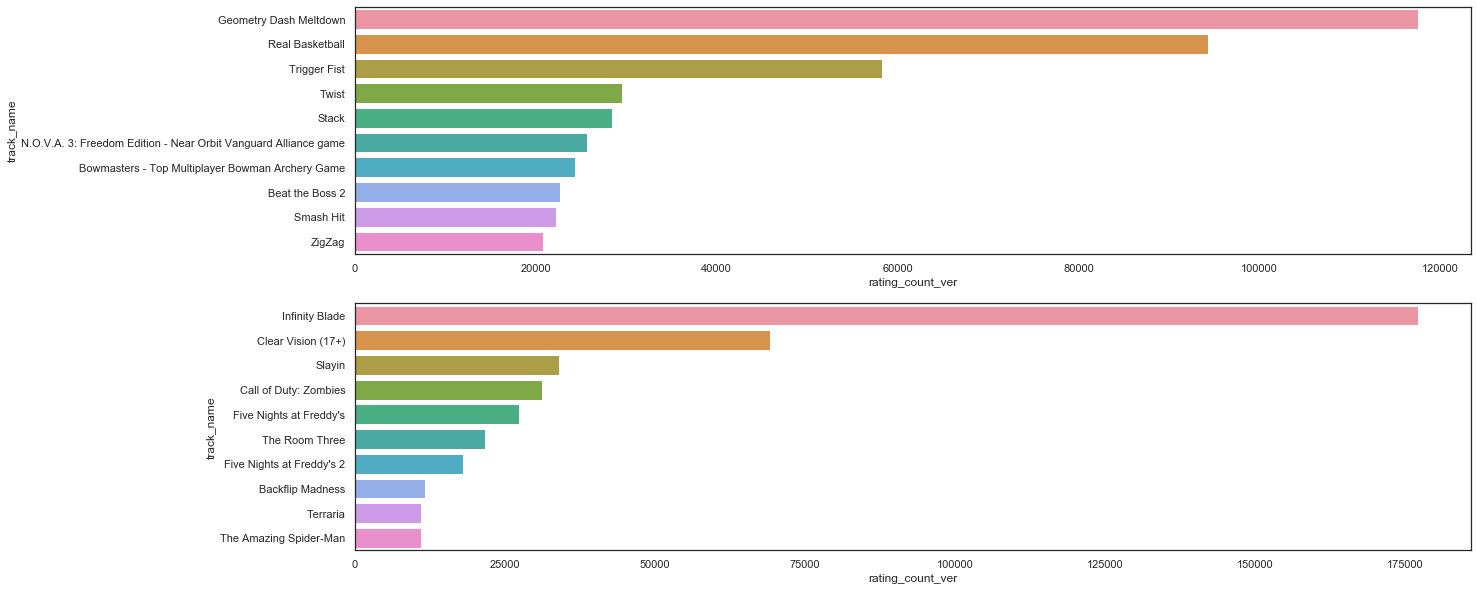

In [83]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

sns.barplot(x=free_games_curr_rt['rating_count_ver'][:10], y=free_games_curr_rt['track_name'][:10], ax=ax1)
sns.barplot(x=paid_games_curr_rt['rating_count_ver'][:10], y=paid_games_curr_rt['track_name'][:10], ax=ax2)

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [86]:
pokemon_filepath = "datasets/Pokemon.csv"

In [90]:
df = pd.read_csv(pokemon_filepath, index_col=0, encoding = "ISO-8859-1")

In [92]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [93]:
df.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage
count,151.00000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,407.07947,64.211921,72.549669,68.225166,67.139073,66.019868,68.933775,1.582781
std,99.74384,28.590117,26.596162,26.916704,28.534199,24.197926,26.746880,0.676832
min,195.00000,10.000000,5.000000,5.000000,15.000000,20.000000,15.000000,1.000000
25%,320.00000,45.000000,51.000000,50.000000,45.000000,49.000000,46.500000,1.000000
50%,405.00000,60.000000,70.000000,65.000000,65.000000,65.000000,70.000000,1.000000
75%,490.00000,80.000000,90.000000,84.000000,87.500000,80.000000,90.000000,2.000000
max,680.00000,250.000000,134.000000,180.000000,154.000000,125.000000,140.000000,3.000000


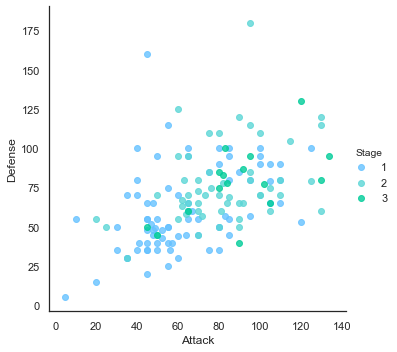

In [98]:
sns.lmplot(x="Attack", y="Defense", data=df, fit_reg=False, hue='Stage')

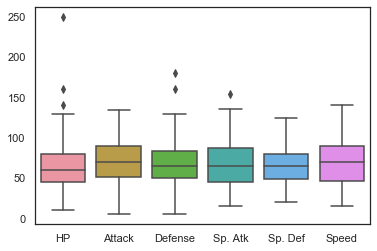

In [101]:
stats_df = df.drop(["Total", "Stage", "Legendary"], axis=1)
sns.boxplot(data=stats_df)

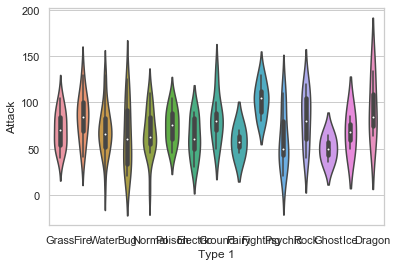

In [109]:
sns.set_style("whitegrid")
sns.violinplot(x="Type 1", y="Attack", data=df)

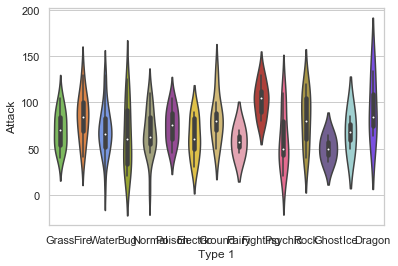

In [110]:
pokemon_palette = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]
sns.violinplot(x="Type 1", y="Attack", data=df, palette=pokemon_palette)

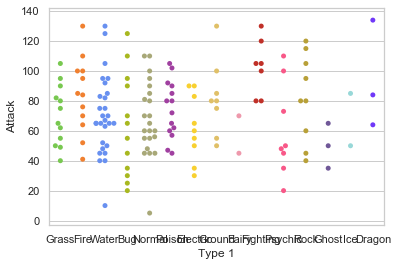

In [111]:
sns.swarmplot(x="Type 1", y="Attack", data=df, palette=pokemon_palette)

Text(0.5, 1.0, 'Attack by Type')

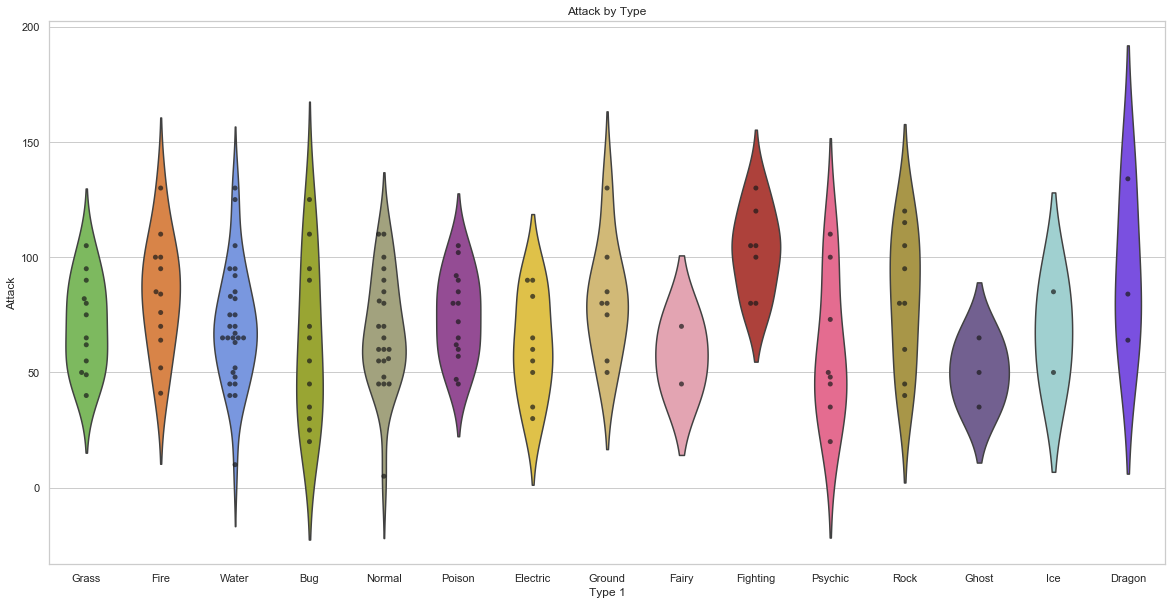

In [113]:
plt.figure(figsize=(20,10))
sns.violinplot(x="Type 1",
               y="Attack", 
               data=df, 
               inner=None,
               palette=pokemon_palette)
sns.swarmplot(x="Type 1", 
              y="Attack", 
              data=df, 
              color='k', 
              alpha=0.7) 
plt.title("Attack by Type")

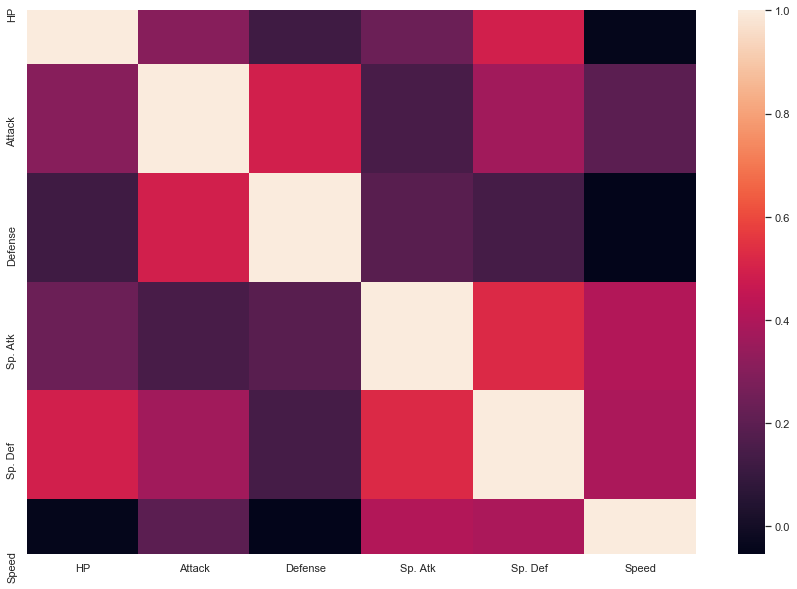

In [117]:
plt.figure(figsize=(15,10))
corr = stats_df.corr()
sns.heatmap(corr)

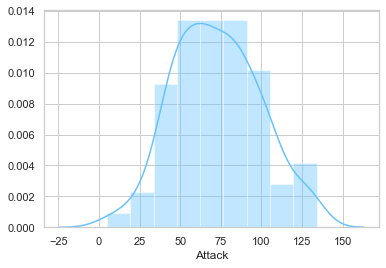

In [118]:
sns.distplot(df.Attack)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

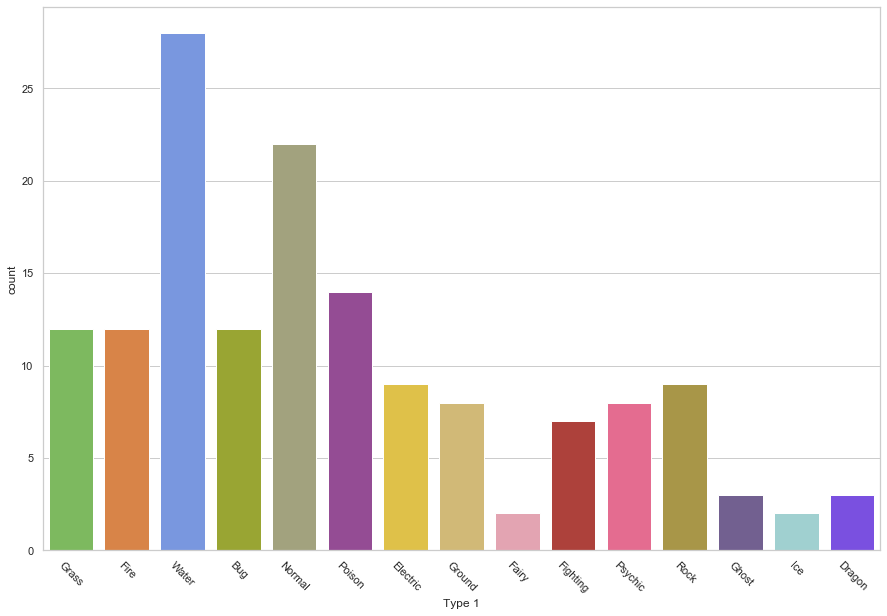

In [120]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Type 1", data=df, palette=pokemon_palette)
plt.xticks(rotation=-45)

/usr/local/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


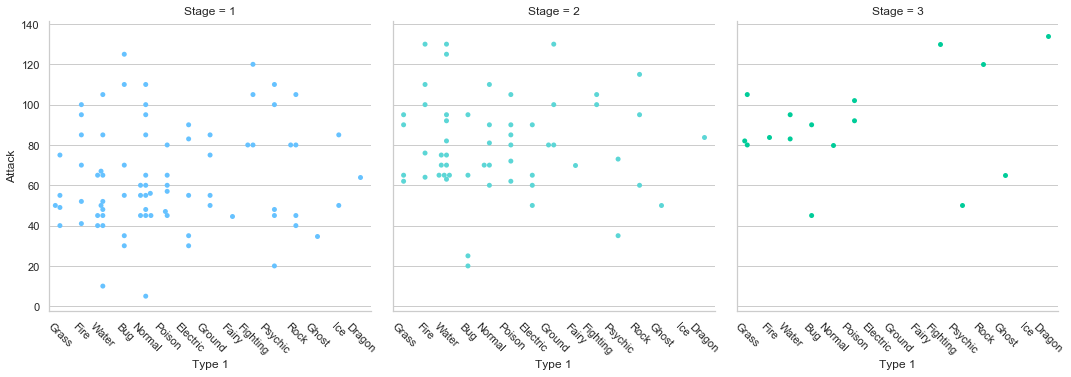

In [121]:
viz = sns.factorplot(x="Type 1", 
                   y="Attack", 
                   data=df, 
                   hue="Stage",
                   col="Stage",
                   kind="swarm")
viz.set_xticklabels(rotation=-45)

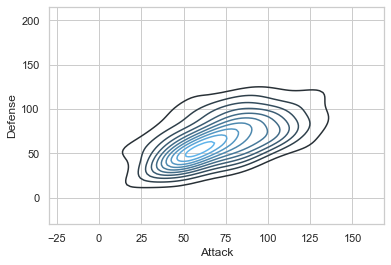

In [122]:
sns.kdeplot(df.Attack, df.Defense)

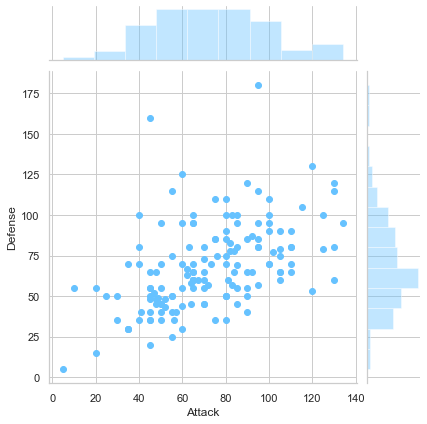

In [124]:
sns.jointplot(x="Attack", y="Defense", data=df)